In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import re
from glob import glob

In [2]:
top = '/Scratch/dh146/projects/niwa-downscaling/runs-csv.bak.20210217-cls-1/'
nz_6_regions = ('ENI', 'ESI', 'NNI', 'NSI', 'WNI', 'WSI')

In [3]:
dfs = []
for var in ('rain', 'temp'):
    for region in nz_6_regions:
        for test in range(10):
            f = f'{top}/*-deuce-member-testcls-{region}-{var}-lr0.2-member-1-t{test}.scalar.csv'
            f = glob(f)[0]
            df = pd.read_csv(f, index_col=0, header=0)
            df = pd.pivot_table(df, columns=['tag'], index=['step'], values='value')
            df['Variable'], df['TestId'], df['Region'] = var, test, region
            dfs.append(df)

In [4]:
all_results = pd.concat(dfs)

In [5]:
all_results

tag   Test/Acc1  Train/Acc  Train/Loss  Val/Acc1 Variable  TestId Region
step                                                                    
0     28.070175  37.380951    2.160717      17.5     rain       0    ENI
1     21.052631  46.190472    2.719836      30.0     rain       0    ENI
2     28.070175  24.047619    2.237005      27.5     rain       0    ENI
3     50.877193  36.190475    1.949064      40.0     rain       0    ENI
4     28.070175  29.047617    2.648872      30.0     rain       0    ENI
...         ...        ...         ...       ...      ...     ...    ...
115   59.649124  57.142853    0.727526      45.0     temp       9    WSI
116   59.649124  59.523808    0.693782      40.0     temp       9    WSI
117   59.649124  57.142853    0.748611      37.5     temp       9    WSI
118   61.403507  62.857140    0.721730      45.0     temp       9    WSI
119   61.403507  69.285713    0.678479      52.5     temp       9    WSI

[14400 rows x 7 columns]

In [6]:
acc_results = pd.pivot_table(all_results, index='step', columns=['Variable', 'TestId', 'Region'],
               values=['Test/Acc1', 'Train/Acc', 'Train/Loss', 'Val/Acc1'])
acc_results

tag       Test/Acc1                                                         \
Variable       rain                                                          
TestId            0                                                          
Region          ENI        ESI        NNI        NSI        WNI        WSI   
step                                                                         
0         28.070175  35.087719  19.298244  21.052631  26.315788  28.070175   
1         21.052631  31.578947  35.087719  31.578947  26.315788  35.087719   
2         28.070175  33.333332  45.614037  31.578947  36.842106  35.087719   
3         50.877193  35.087719  35.087719  21.052631  36.842106  36.842106   
4         28.070175  31.578947  45.614037  21.052631  36.842106  28.070175   
...             ...        ...        ...        ...        ...        ...   
115       21.052631  31.578947  43.859650  21.052631  28.070175  28.070175   
116       29.824562  33.333332  36.842106  21.052631  33.333332  29.824562   
117       22.807018  31.578947  40.350876  21.052631  35.087719  29.824562   
118       29.824562  29.824562  40.350876  21.052631  36.842106  35.087719   
119       19.298244  33.333332  38.596489  21.052631  36.842106  29.824562   

tag                                                   ... Val/Acc1        \
Variable                                              ...     temp         
TestId            1                                   ...        8         
Region          ENI        ESI        NNI        NSI  ...      NNI   NSI   
step                                                  ...                  
0         50.877193  35.087719  19.298244  31.578947  ...     30.0  37.5   
1         42.105263  33.333332  35.087719  24.561403  ...     27.5  45.0   
2         50.877193  33.333332  45.614037  47.368420  ...     20.0  22.5   
3         21.052631  33.333332  19.298244  31.578947  ...     35.0  30.0   
4         21.052631  35.087719  45.614037  31.578947  ...     35.0  50.0   
...             ...        ...        ...        ...  ...      ...   ...   
115       24.561403  33.333332  47.368420  49.122807  ...     45.0  80.0   
116       28.070175  33.333332  50.877193  47.368420  ...     55.0  67.5   
117       49.122807  29.824562  47.368420  47.368420  ...     47.5  80.0   
118       45.614037  33.333332  47.368420  49.122807  ...     52.5  67.5   
119       49.122807  33.333332  52.631577  47.368420  ...     52.5  80.0   

tag                                                        
Variable                                                   
TestId                   9                                 
Region     WNI   WSI   ENI    ESI   NNI   NSI   WNI   WSI  
step                                                       
0         27.5  42.5  32.5   27.5  35.0  37.5  37.5  22.5  
1         35.0  40.0  32.5   27.5  42.5  27.5  35.0  35.0  
2         45.0  20.0  45.0   27.5  45.0  25.0  45.0  45.0  
3         22.5  32.5  42.5   35.0  45.0  30.0  42.5  45.0  
4         25.0  30.0  27.5   32.5  25.0  35.0  27.5  32.5  
...        ...   ...   ...    ...   ...   ...   ...   ...  
115       50.0  32.5  37.5  100.0  25.0  92.5  75.0  45.0  
116       60.0  37.5  42.5   92.5  35.0  92.5  87.5  40.0  
117       62.5  50.0  32.5   97.5  60.0  90.0  65.0  37.5  
118       62.5  40.0  30.0   92.5  42.5  92.5  42.5  45.0  
119       62.5  27.5  50.0  100.0  32.5  80.0  47.5  52.5  

[120 rows x 480 columns]

In [7]:
test_bests = all_results.groupby(['Variable', 'Region', 'TestId']).max()
test_bests

tag                     Test/Acc1  Train/Acc  Train/Loss  Val/Acc1
Variable Region TestId                                            
rain     ENI    0       50.877193  73.095230    2.719836      65.0
                1       54.385963  49.761902    3.253328      62.5
                2       56.140350  49.285713    4.216676      55.0
                3       50.877193  49.761906    4.360884      55.0
                4       50.877193  66.190468    3.767791      60.0
...                           ...        ...         ...       ...
temp     WSI    5       59.649124  97.142860    3.216415     100.0
                6       59.649124  97.619041    4.001831      95.0
                7       63.157894  69.761902    4.624545      72.5
                8       61.403507  50.952385    4.043716      57.5
                9       61.403507  71.904762    4.313280      67.5

[120 rows x 4 columns]

In [16]:
test_bests.groupby(['Variable', 'Region']).agg(
    {'Test/Acc1': max, 'Train/Acc': max, 'Train/Loss': min, 'Val/Acc1': min})

Test/Acc1  Train/Acc  Train/Loss  Val/Acc1
Variable Region                                            
rain     ENI     63.157894  76.428574    2.719836      50.0
         ESI     50.877193  93.571426    3.110109      52.5
         NNI     54.385963  92.142860    3.612630      47.5
         NSI     56.140350  75.714279    3.339222      47.5
         WNI     56.140350  97.142860    3.061159      47.5
         WSI     57.894737  94.047615    2.745622      50.0
temp     ENI     75.438599  98.809517    3.030588      52.5
         ESI     75.438599  96.428566    2.231125      55.0
         NNI     78.947365  97.619041    2.996218      52.5
         NSI     59.649124  96.904762    3.287258      52.5
         WNI     73.684212  97.857140    3.188124      52.5
         WSI     63.157894  97.619041    3.216415      57.5

In [15]:
test_bests.loc['temp', 'NNI']

tag     Test/Acc1  Train/Acc  Train/Loss  Val/Acc1
TestId                                            
0       78.947365  62.142857    5.654994      62.5
1       77.192978  62.619045    6.599640      52.5
2       77.192978  76.666664    5.315583      55.0
3       77.192978  59.523808    4.425900      62.5
4       77.192978  93.571426    3.666932      77.5
5       77.192978  89.999992    3.713197      72.5
6       77.192978  97.619041    2.996218     100.0
7       77.192978  77.142860    8.844531      77.5
8       77.192978  66.190475    3.642994      75.0
9       77.192978  75.714279    4.723601      60.0

In [13]:
def plot(savefig=None):
    for var in ('temp', 'rain'):
        fig = plt.figure(figsize=(4, 2))
        ax = plt.gca()
        _df = pd.pivot_table(test_bests.loc[(var,)][[f'Test/Acc1']],
                             columns=['Region'], index='TestId')
        if var == 'temp':
            kwargs = {'patch_artist': True,
                      'boxprops': {'facecolor': 'gainsboro', 'color': 'lightcoral'},
                      'whiskerprops': {'color': 'lightcoral'}
                     }
        else:
            kwargs = {}
        _df.boxplot(ax=ax, **kwargs)
        ax.set_xticks(range(1, 7))
        ax.set_xticklabels(nz_6_regions, rotation=90)
        ax.set_xlabel('Region')
        aaa = dict([('rain', 'RAIN'), ('temp', 'TMEAN')])[var]
#         bbb = ['', ' (VCSN normalised)'][normalized]
        ax.set_title(f'{aaa}')
        ax.set_ylabel('Accuracy (%)')
        ax.set_ylim(35, 85)

        fig.subplots_adjust(hspace=0.4)
        if savefig is not None:
            plt.savefig(f'{savefig}/{var}-accuracy-by-regions.pdf', bbox_inches='tight')
        plt.show()

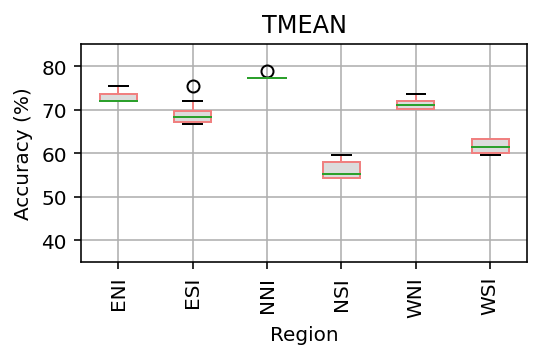

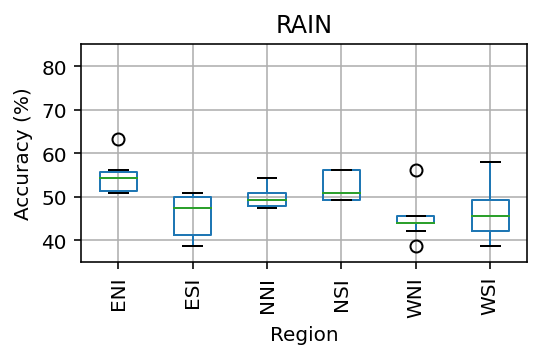

In [14]:
plot()

mkdir: cannot create directory ‘saved_images/acc-cls’: File exists


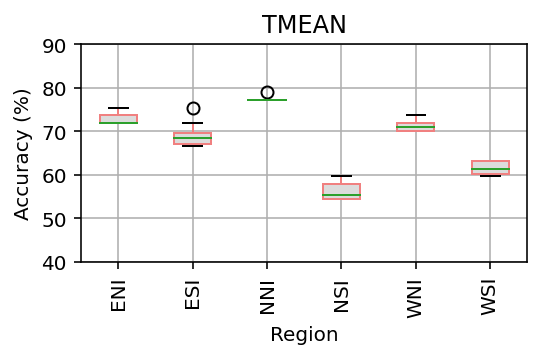

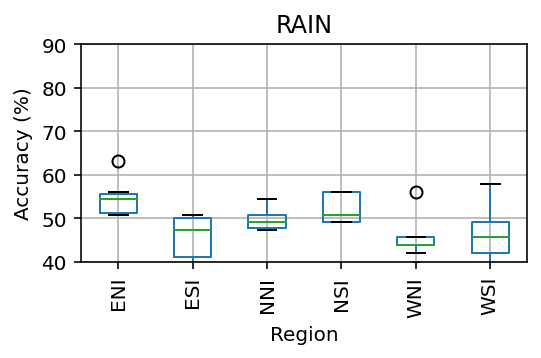

In [10]:
!mkdir saved_images/acc-cls
plot(savefig='saved_images/acc-cls')